<a href="https://colab.research.google.com/github/iagoslopes/Mineracao_Dados-Iago/blob/master/Iago_de_Souza_Lopes-P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Examinando o dataset:

In [ ]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

Analisando quais colunas existem dentro do dataset:

In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Com base nas informações fornecidas, existem 12991 linhas e 14 colunas dentro do dataset. Porém podemos descartar algumas colunas ja que existem dados ausentes e/ou desnecessários, como Unnamed, region_2, taster_name e taster_twitter_handle.

In [ ]:
df.describe()

Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

A função describe() mostra para nós uma distribuição de pontos para as garrafas de vinho, onde a pontuação mínima é de 80 e máxima de 100. Com base nas informações é possível notar que a garrafa mais barata custando `$4` é a que possível menor pontuação de 80, ja a garrafa mais cara custando `$3.300` possui uma pontuação de 100, ou seja, a maior pontuação de acordo com a classificação:



*   98–100 – Classic
*   94–97 – Superb
*   90–93 – Excellent
*   87–89 – Very good
*   83–86 – Good
*   80–82 – Acceptable

In [ ]:
df["country"].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia                       12
Czech Republic               12
Macedonia                    12
Cyprus                       11
India                         9
Switzerland                   7
Luxembourg                    6
Bosnia and Herzegovina        2
Armenia                       2
Slovakia                      1
China                         1
Egypt                         1
Name: count, dtype: int64

Usando a função value_count() com a coluna `"country"` para mostrar as avaliações dos vinhos em cada pais.

> Podemos perceber que os paises com a maioria das avaliações são dos EUA, França, Itáia, Espanha e Porgutal.



In [ ]:
df["variety"].value_counts()

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 707, dtype: int64

Dessa vez usamos na coluna `"variety"`, identificando os tipos de uvas usados para a fabricação dos vinhos avaliados.

# Limpando os dados

Agora iremos limpar alguns dados, pois não fornecem dados úteis para nossa análise, sendo esses campos: Unnamed: 0, designation, region_1, region_2, taster_name e taster_twitter_handle.

Antes de tudo, teremos que realizar uma cópia do DataFrame, para isso usamos o copy():

In [ ]:
df1 = df.copy()

Agora que realizamos a cópia, vamos começar removendo as colunas que não vamos precisar:

In [ ]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province                                              title  \
0  Sicily & Sardinia                  Nicosia 2013 Vulkà Bianco  (Etna)   
1              Douro      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2             Oregon      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3           Michigan  St. Julian 2013 Reserve Late Harvest Riesling ...   
4             Oregon  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

Mesmo eliminando as colunas desnecessárias, ainda temos dados ausentes:

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Podemos fazer alguns cálculos de proporção na coluna de preço (que é bastante importante para nossa análise) e apresenta dados ausentes:

In [ ]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


Certo!, se removermos as linhas com valores nulos da coluna preço(price), ainda ficaremos com 93% das linhas restantes. Como a base de dados é suficientemente grande, podemos remover essas linhas filtrando tambem por país e uvas (country e variety) que tambem contem dados nulos.

In [ ]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


A partir de agora, o dataset esta sem dados nulos e pronto para a nossa análise.

# Análise exploratória

Sempre que houver dúvidas por onde começar, visualize os dados! Vamos olhar para a distribuição dos pontos dados durante as avaliações dos vinhos, parece um bom ponto de partida.

Text(0, 0.5, 'Frequência')

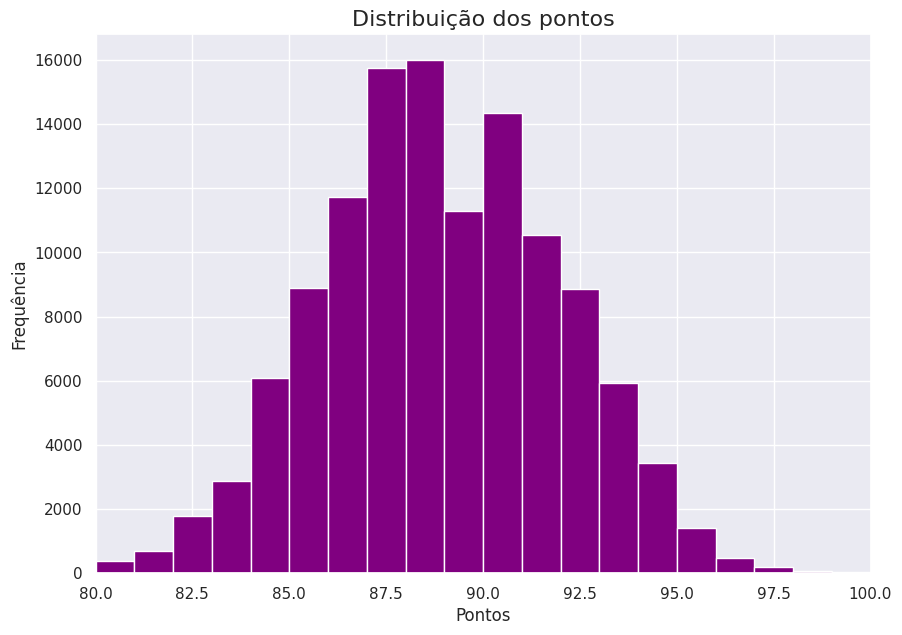

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x="points",
         bins=np.arange (80, df1["points"].max()+1, 1),
         color = "purple")
plt.xlim(80,100)
plt.title("Distribuição dos pontos", fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("Frequência")

Existe uma distribuição quase normal dos pontos variando a escala entra 80 e 100. Vamos ver quais países estão no Top 10 que mais produzem vinhos.

In [ ]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

country
US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: count, dtype: int64

Com base nesse filtro podemos gerar um gráfico para comparar os países que mais tiveram vinhos avaliados:

Text(0, 0.5, 'Total de avaliações')

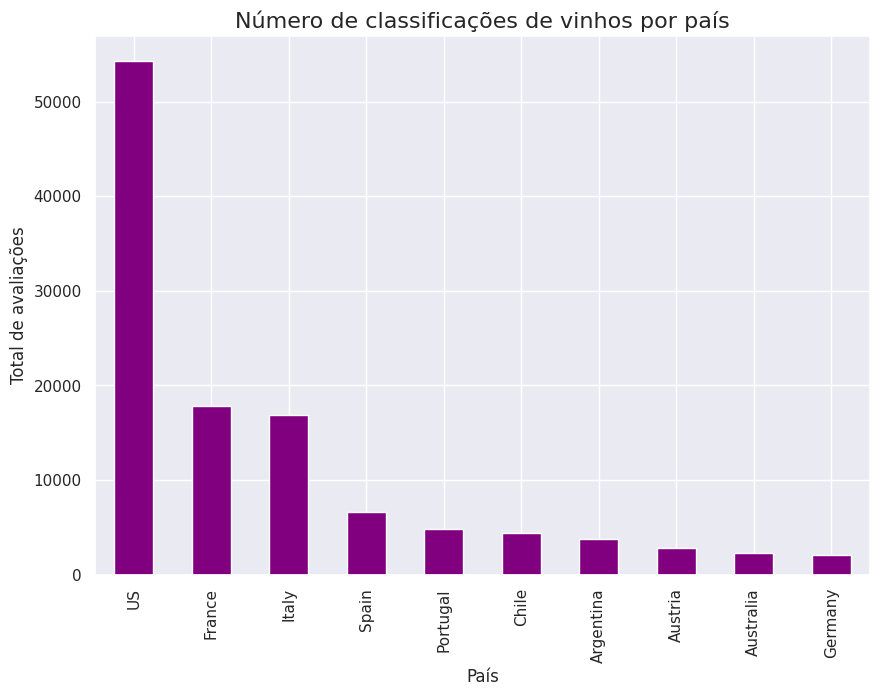

In [ ]:
plt.figure(figsize=(10,7))
country_top_10.plot(kind="bar", color = "purple")
plt.title("Número de classificações de vinhos por país", fontsize = 16)
plt.xlabel("País")
plt.ylabel("Total de avaliações")

Com base nessa ordenação do gráfico acima, vamos investigar quantos países produzem vinho de melhor qualidade de acordo com as classificações.

In [ ]:
melhor_qualidade = df1.groupby("country")["points"].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
# Converter em uma Serie o DataFrame usando o método to_frame()
melhor_qualidade.to_frame().style.background_gradient(cmap="Purples",high=0.5)

Podemos gerar um gráfico desse filtro:

<ipython-input-17-7e7cadfcbfc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Purples_r")


Text(0, 0.5, 'País')

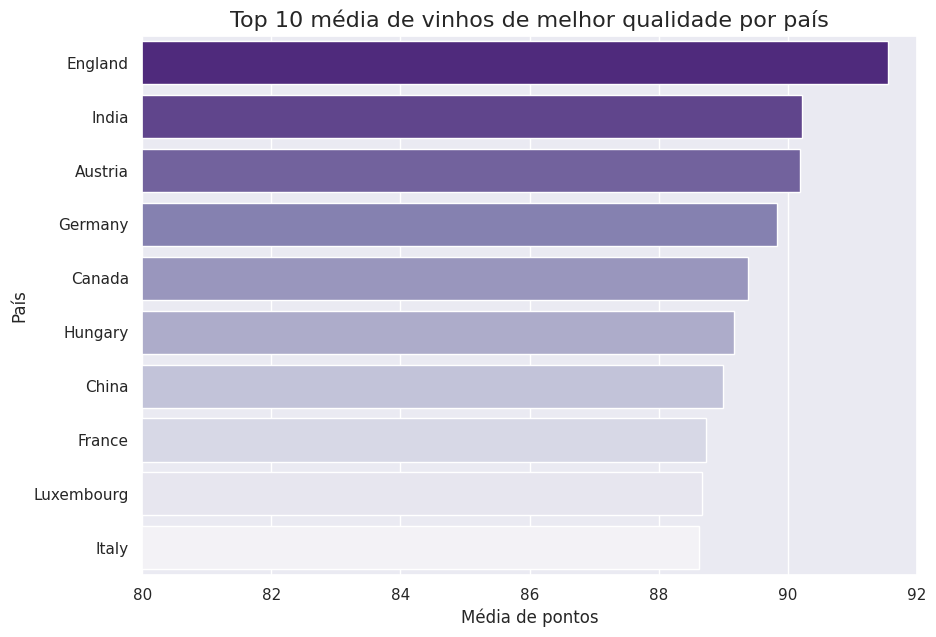

In [ ]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10,7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title("Top 10 média de vinhos de melhor qualidade por país", fontsize = 16)
plt.xlabel("Média de pontos")
plt.ylabel("País")

Com base na nossa avaliação, podemos perceber que o país com melhor avaliação(que produziu o vinho de melhor qualidade) foi a Inglaterra. De começo podemos achar estranho, mas isso ocorre por que talvez haja menos vinhos da Inglaterra no nosso DataFrame e eles tenham uma pontuação alta, representando um aumento na média. Vale a pena investigarmos isso mais a fundo, podemos olhar para os países com pontuação máxima acima de 95(vinhos excelentes).

In [ ]:
# Número de vinhos por país com classificações mais altas 95-100
high_scores = df1[df1["points"]>=95]
high_scores["country"].value_counts()

country
US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: count, dtype: int64

Como pode ser observado, nessa ultima análise, podemos notar a classificação diferente do gráfico anterior, isso ocorre pois existe uma quantidade maior de pontuações altas nos países apresentados acima, diferente do gráfico anterior, que mostra uma média maior pois existe menos avaliações. Podemos criar um gráfico do tipo bloxplot que nos permitirá ver o máximo, o mínimo e a média das pontuações por cada país. Como essa base de dados apresenta mais vinhos avaliados dos EUA, é provável que haja uma grande variedade de vinhos do país, enquanto a Inglaterra, que teve a melhor pontuação média, apresenta menos vinhos na base de dados, o que resulta em uma comparação injusta.

Text(0, 0.5, 'País')

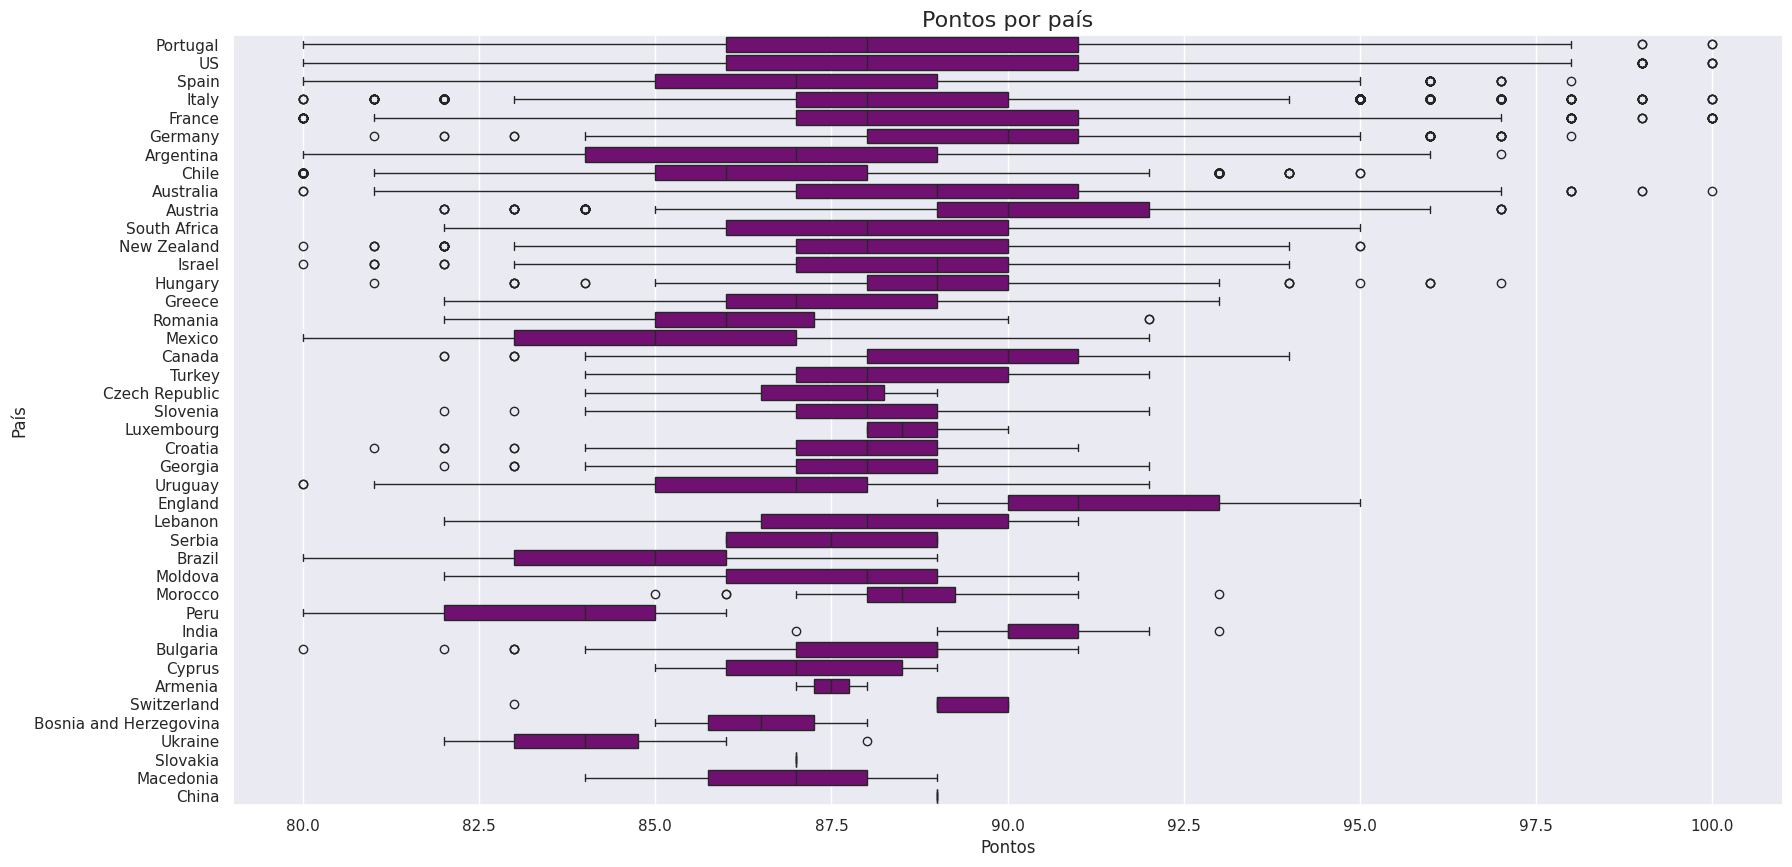

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x="points", y="country", color = "Purple")
plt.title("Pontos por país", fontsize = 16)
plt.xlabel("Pontos")
plt.ylabel("País")

Embora os vinhos da Inglaterra tenham os pontos mais altos em média, os vinhos de Portugal, EUA, Itália, França e Austrália, receberam uma pontuaçã perfeita de 100 pontos. Há mais vinhos desses países na base de dados, portanto eles receberam uma gama maior de pontos.

OK, agora que vimos as distribuições de pontos por cada país, vamos investigar o preço do vinho nos países:

<ipython-input-20-303ee2821faa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Purples_r")


Text(0, 0.5, 'País')

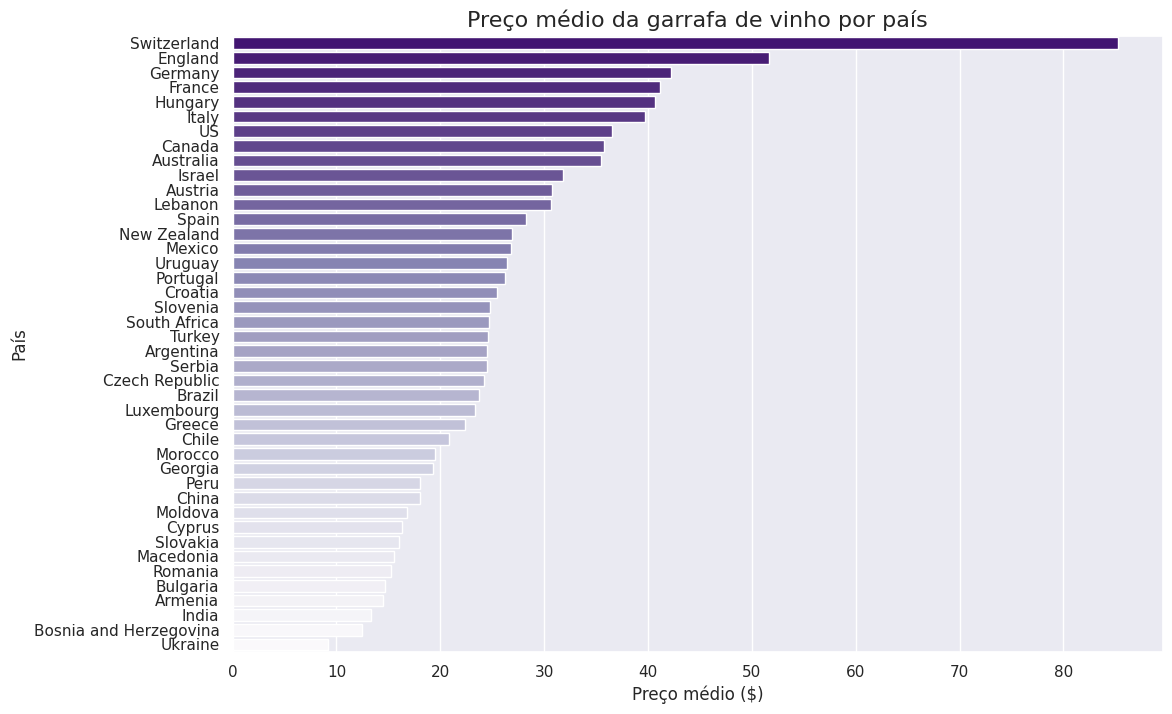

In [ ]:
avarage_price = df1.groupby("country")["price"].mean() # Calculando a média da coluna "price"
avarage_price = avarage_price.sort_values(ascending=False) # Filtrando em ordem descendente
y = avarage_price.index.to_series()
x = avarage_price.values

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title("Preço médio da garrafa de vinho por país", fontsize = 16)
plt.xlabel("Preço médio ($)")
plt.ylabel("País")

A Suíça, produz o vinho mais caro, com o preço médio da garrafa de mais de `$80`. Já o vinho da Ucrânia, esta no outro extremo, com o preço médio mais baixo, `$10` a garrafa. Vamos investigar se o preço esta relacionado a qualidade do vinho. A utilização de histogramas para essa tarefa parece um bom plano:

Text(0, 0.5, 'Frequência')

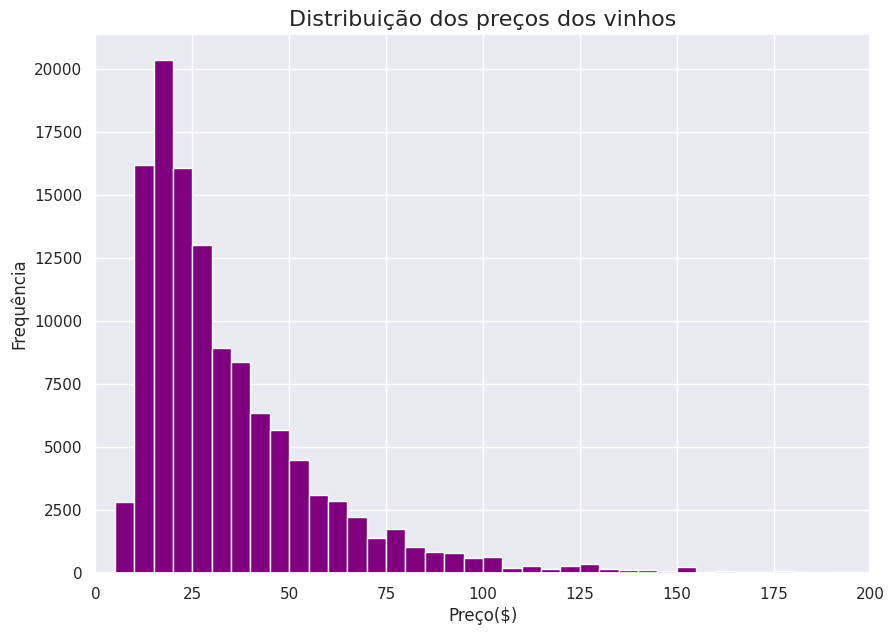

In [ ]:
plt.figure(figsize=(10, 7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x="price", bins=bins, color = "Purple")
plt.xlim(0, 200)
plt.title("Distribuição dos preços dos vinhos", fontsize = 16)
plt.xlabel("Preço($)")
plt.ylabel("Frequência")

Interessante, os dados de preço dos vinhos apresentam uma distorção grande para a esquerda. Nesse caso precisamos de uma transformação logarítmica nos dados.

In [ ]:
# Distribuição normal
df1["price"].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [ ]:
# Distribuição logarítmica
np.log10(df1["price"].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

Agora utilizando os dados com a transformação logarítmica para o nosso histograma:

Text(0, 0.5, 'Frequência')

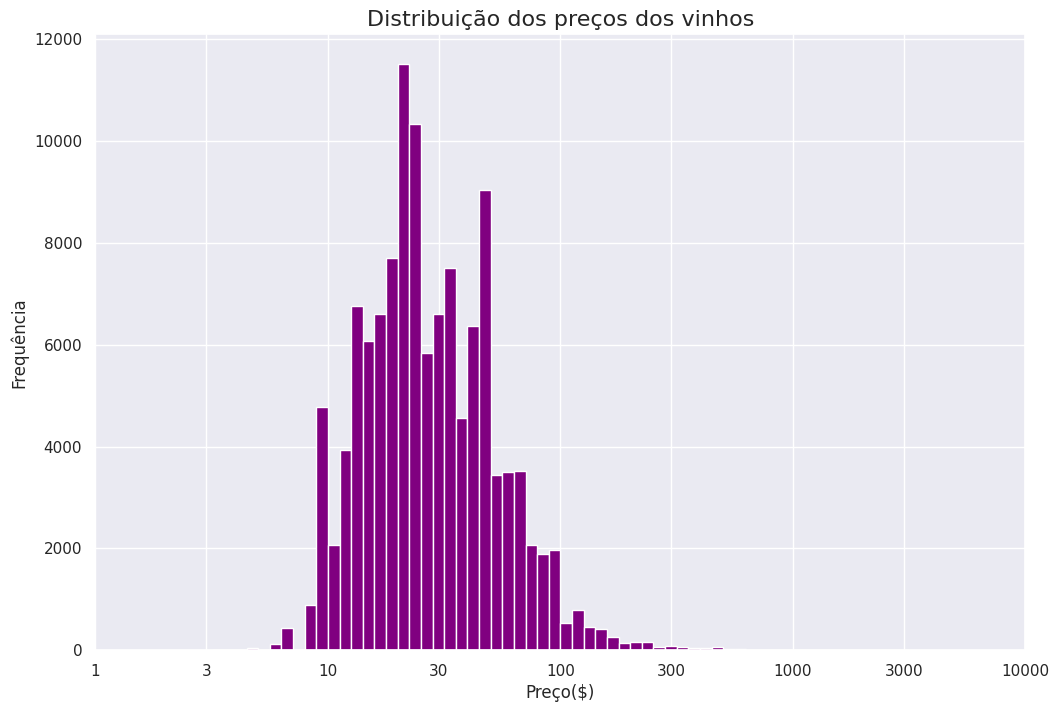

In [ ]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange (0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x="price", bins=bins, color = "Purple")
plt.title("Distribuição dos preços dos vinhos", fontsize = 16)
plt.xscale("log")
plt.xticks(ticks, ticks)
plt.xlabel("Preço($)")
plt.ylabel("Frequência")

Bem melhor! Agora é possível ver uma distribuição (quase normal). Existe um salto na região dos 10 dólares e um pico mais visível em pouco mais de 20 dólares. Depois temos outro pico acima de `$50`. Agora podemos plotar um gráfico do tipo scatter para visualizar se existe uma correlação entre a pontuação e o valor da garrafa.

<Axes: >

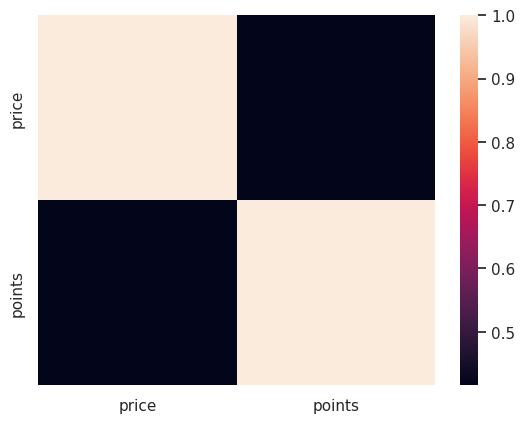

In [ ]:
# Heatmap (mapa de calor)

sns.heatmap(df1.loc[:, ['price', 'points']].corr())

Criando um correlação entre preço e pontos:

Text(0, 0.5, 'Pontos')

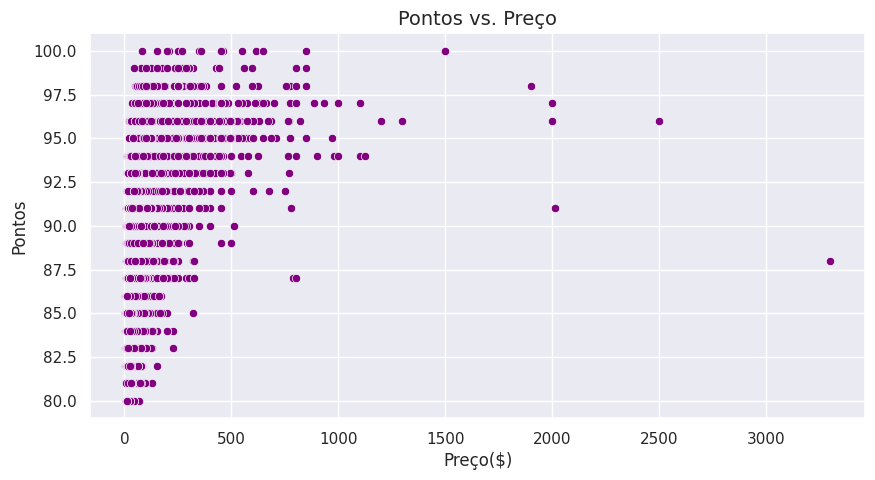

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1, x='price', y='points', color = "Purple")
plt.title("Pontos vs. Preço", fontsize = 14)
plt.xlabel("Preço($)")
plt.ylabel("Pontos")

Text(0, 0.5, 'Pontos')

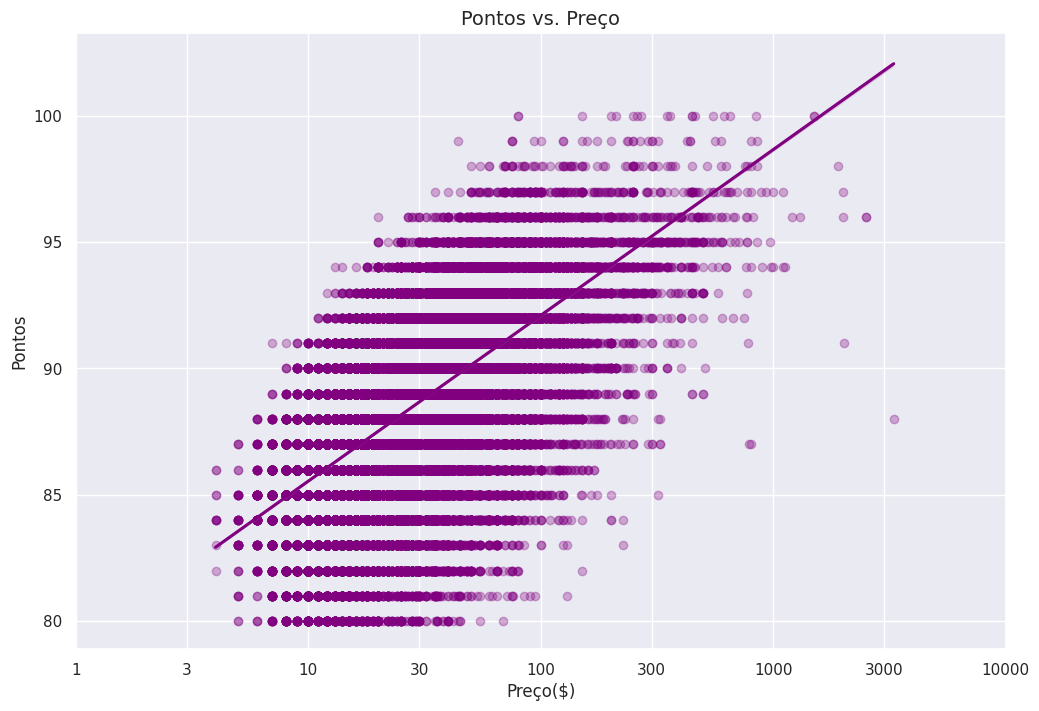

In [ ]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x="price", y="points", data=df1, color = "Purple", logx=True, scatter_kws={"alpha":0.3})
plt.title("Pontos vs. Preço", fontsize = 14)
plt.xscale("log")
plt.xticks(x, x)
plt.xlabel("Preço($)")
plt.ylabel("Pontos")

O gráfico nos mostra uma tendência em relação às duas variáveis(pontuação e preços), mas não necessariamente acontece em todos os casos, por exemplo, temos alguns casos em que o valor é `$4` e a pontuação é praticamente a mesma que um vinho de `$3000`, mas em suma maioria quanto maior o valor melhor a qualidade do vinho. Agora vamos listar esses dois valores para descobrir quais vinhos são esses, buscando pelo valor máximo e mínimo:

In [ ]:
df1[df1["price"] == df1["price"].min()][:1]

country                                        description  points  \
1987   Spain  Berry and cherry aromas are surprisingly sturd...      85   

      price       province                                              title  \
1987    4.0  Central Spain  Felix Solis 2013 Flirty Bird Syrah (Vino de la...   

     variety       winery  
1987   Syrah  Felix Solis

In [ ]:
df1[df1["price"] == df1["price"].max()][:1]

country                                        description  points  \
80290  France  This ripe wine shows plenty of blackberry frui...      88   

        price  province                                 title  \
80290  3300.0  Bordeaux  Château les Ormes Sorbet 2013  Médoc   

                        variety                    winery  
80290  Bordeaux-style Red Blend  Château les Ormes Sorbet

Com base nessa ultima análise, temos um vinho Espanhol com 85 pontos de classificação que custa `$4` enquanto um vinho Francês de 88 pontos que custa `$3300`.
Agora vamos investigar se certas variedades de vinhos (tipos de uva) são de melhor qualidade. Para isso podemos filtrar uma amostra de 20 melhores vinhos e ver como eles pontuam.

In [ ]:
df1["variety"].value_counts()[:20]

variety
Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: count, dtype: int64

Gráfico com bloxplot:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

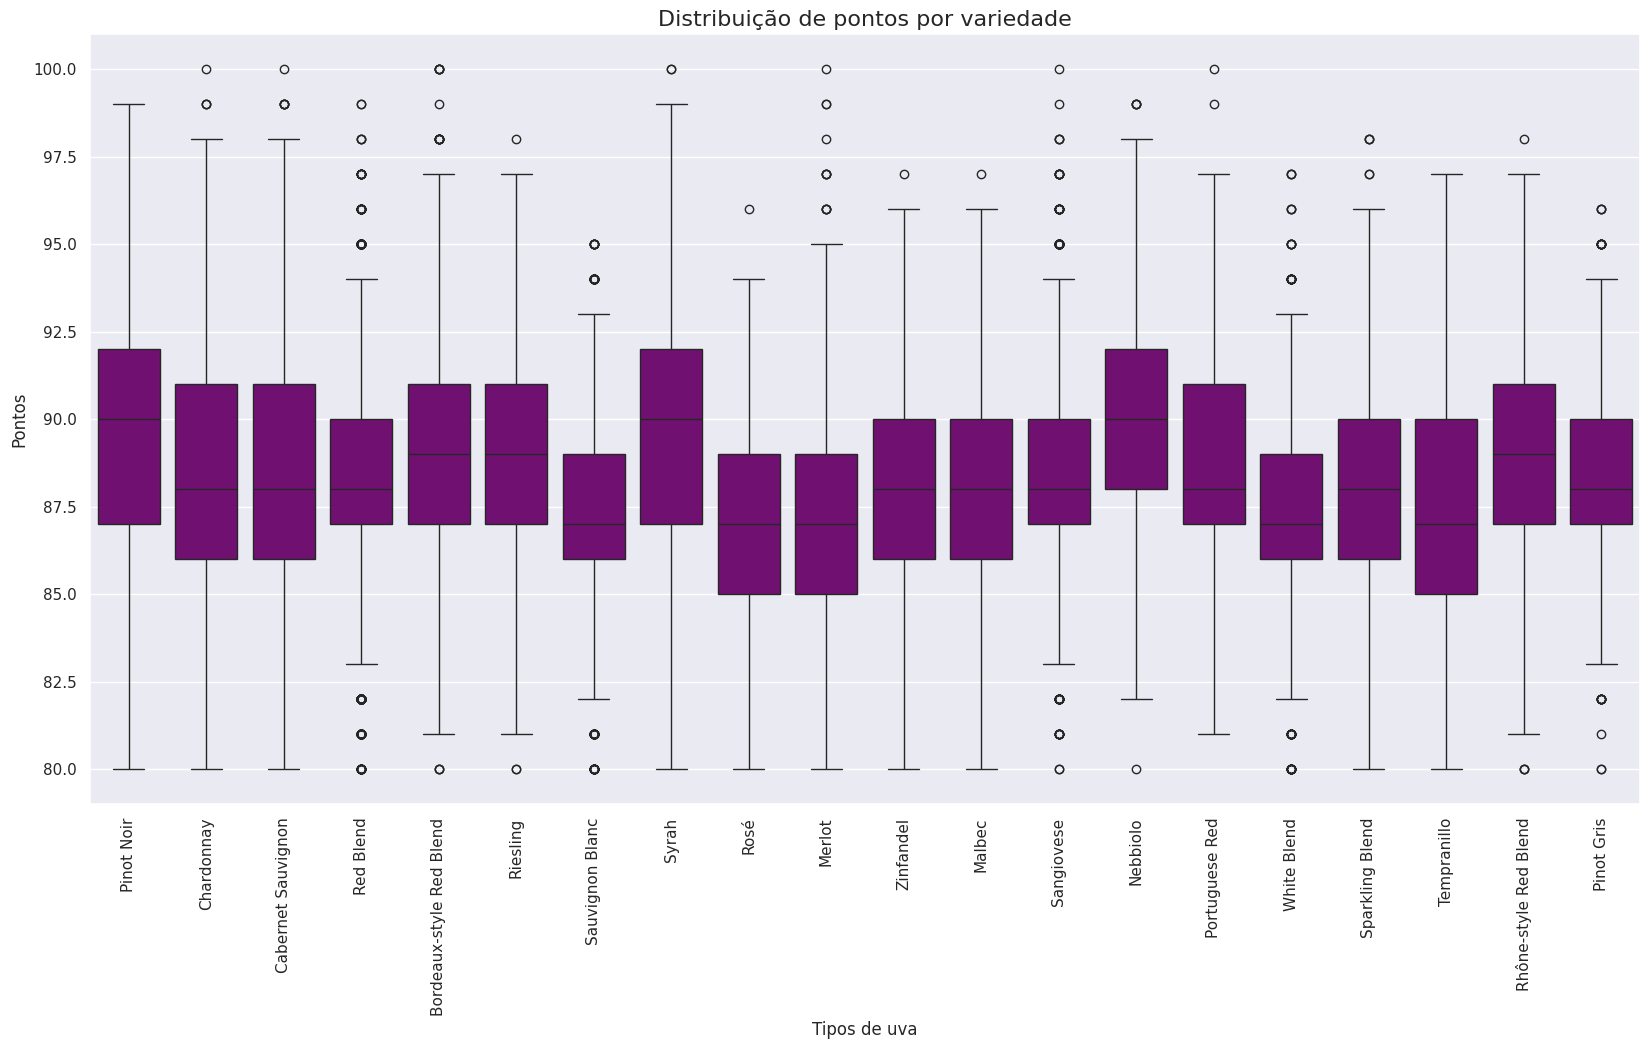

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1,
            x="variety",
            y="points",
            color = "Purple",
            order=df1["variety"].value_counts().iloc[:20].index)
plt.title("Distribuição de pontos por variedade", fontsize = 16)
plt.xlabel("Tipos de uva")
plt.ylabel("Pontos")
plt.xticks(rotation=90)

Listando o Top 20 melhores vinhos (com melhor classificação) na base de dados, vemos que a variedade Pinot Noir tende a ter o melhor desempenho, com a pontuação média mais alta.
Já sabemos que a qualidade está fortemente relacionada ao preço, mas nem todos os clientes podem gastar 3000 dólares em uma garrafa de vinho toda semana. Nossa tarefa agora é descobrir o melhor custo-benefício em algumas faixas de preço.

* Até $15
* Entre `$15` e `$30`
* Entre `$30` e `$50`
* Entre `$50` e `$250`
* Entre `$250` e `$500`
* Acimda de `$500`

In [ ]:
# Top 10 custando até $15
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])



> Com base nos dados, uma boa escolha aqui seria um vinho Português de 94 pontos por `$13`, Quinta dos Murças 2011 Assobio Red(Douro)



In [ ]:
# Top 10 custando entre $15 e $30
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])

Já nessa lista, se o cliente estiver disposto a gastar um pouco mais. A melhor opção seria um vinho dos EUA de 96 pontos por $20

In [ ]:
# Top 10 custando entre $30 e $50
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])

Se a preferência do cliente for da variedade Chardonnay, nesse filtro é possivel levar um vinho de 99 pontos por `$44`

In [ ]:
# Top 10 custando entre $50 e $250
between_50_and_250 = df1.drop(["description", "province", "winery"], axis=1)
between_50_and_250 = between_50_and_250.query("price > 50 and price <= 250")
between_50_and_250 = between_50_and_250.sort_values(by="points", ascending=False)[:10]
between_50_and_250.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])

> Por $80 é possivel experimentar o sabor de um vinho de 100 pontos, com duas opções: Charles Smith 2006 Royal City Syrah e Cayuse 2008 Bionic Frog Syrah, ambos dos EUA.

In [ ]:
# Top 10 custando entre $250 e $500
between_250_and_500 = df1.drop(["description", "province", "winery"], axis=1)
between_250_and_500 = between_250_and_500.query("price > 250 and price <= 500")
between_250_and_500 = between_250_and_500.sort_values(by="points", ascending=False)[:10]
between_250_and_500.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])

Já para os clientes que gostam de gastar um pouco mais, temos o vinho Françês avaliado em 100 pontos por `$259`.

In [ ]:
# Top 10 custando acima de $500
above_500 = df1.drop(["description", "province", "winery"], axis=1)
above_500 = above_500.query("price > 500")
above_500 = above_500.sort_values(by="points", ascending=False)[:10]
above_500.style.background_gradient(cmap="YlOrRd", high=0.5, subset=["price"])

Estamos no nível de vinhos caros, que mostra certo respeito ao compra-los, onde as pessoas mais afortunadas vão para saborear e desgutar de vinhos caros, e suma maoria a faixa de preço fica entre `$550` à `$850`, saboreando vinhos excelentes.

Nossa última tarefa na analise é descobrir quais palavras são mais utilizadas para descrever um vinho. Para isso podemos utilizar a biblioteca wordcloud que separa cada palavra em um texto e nos permite filtrar as de maior ocorrência, gerando uma nuvem de palavras.

Primeiro vamos importar a biblioteca e combinar todas as descrições das avaliações em um só texto:

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = df1["description"][1]
text = " ".join(i for i in df1["description"])
len(text)

29653210

Temos agora um imenso texto agrupado. A biblioteca disponibiliza uma funcionalidade chamada stopwords que são uma lista de palavras que serão eliminadas no processo de criação da nossa nuvem de palavras.

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordscloud = WordCloud(stopwords=stopwords,
                       background_color="white",
                       width=2048,
                       height=1024,
                       max_words=1000).generate(text)

Com a nuvem de palavras pronta, agora só precisamos plotar uma imagem exibindo as palavras mais utilizadas nas descrições de vinhos:

(-0.5, 2047.5, 1023.5, -0.5)

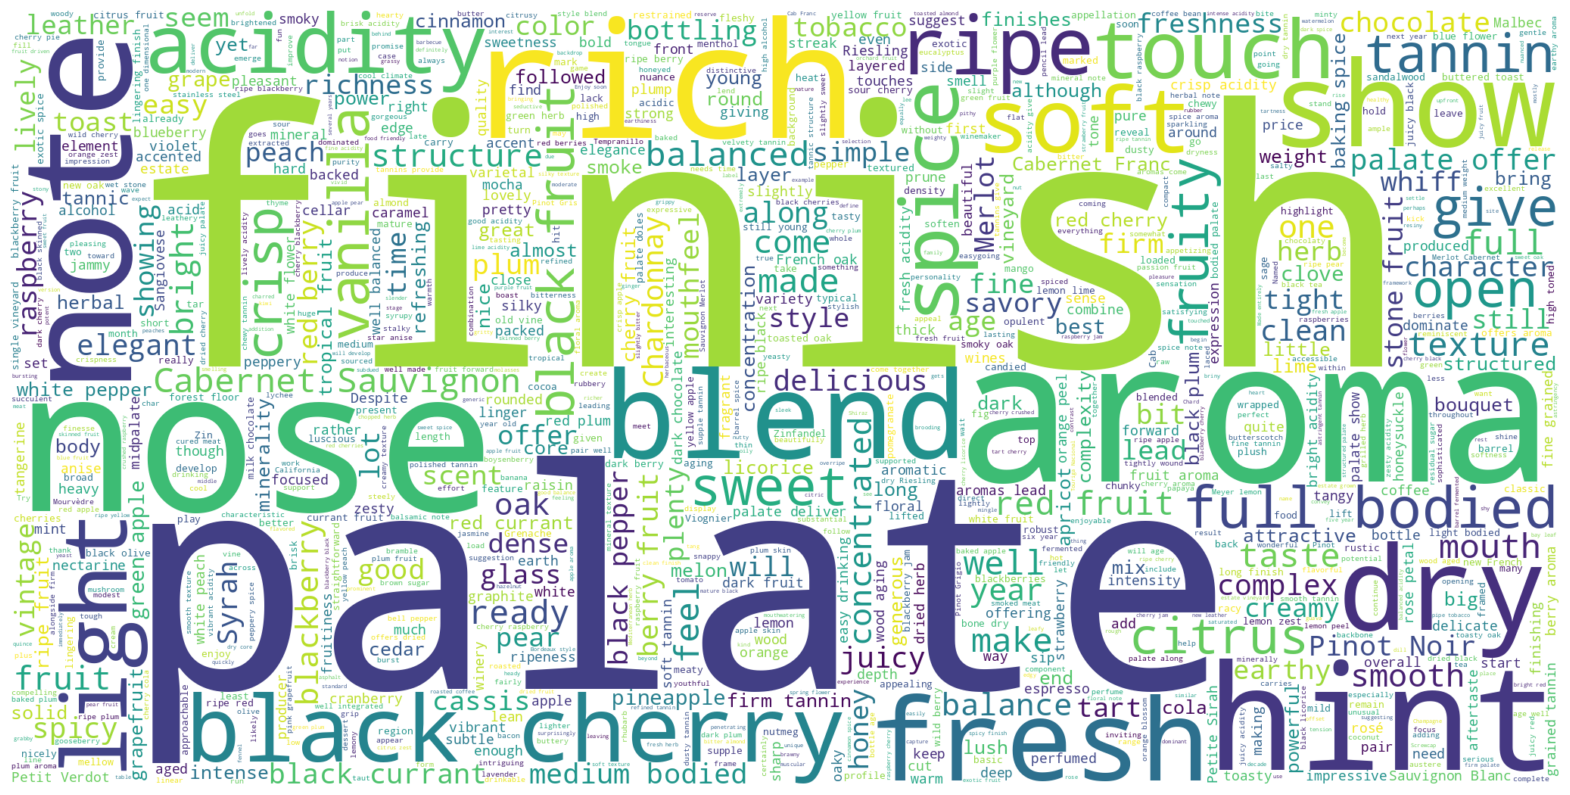

In [ ]:
plt.figure(figsize=(20,18))
plt.imshow(wordscloud, interpolation="bilinear")
plt.axis("off")

# Conclusão

Agora podemos finalmente responder as perguntas que recebemos no começo do projeto.

* **De onde vem o melhor vinho?**

   *R: A inglaterra é quem em média produz vinhos soberbos. Mas se você quiser uma garrafa com pontuação perfeita de 100 deve observar os vinhos de outros países: França, Itália, EUC, Portugal ou Austrália.*

* **O preço do vinho está relacionado com a qualidade ?**

   *R: É nitido que o preço do vinho está relacionado com a qualidade. Mas se você souber onde procurar, pode encontrar um vinho de `$4` que possui apenas 3 pontos abaixo de uma garrada que custa `$3.300`.*

* **Certas variedades de uvas são de maior qualidade ?**

   *R: Todas as variedades estão na mesma situação (niveladas). A maior aposta com base nos dados é `Pinot Noir`.*

* **Qual é o melhor vinho em cada faixa de preço ?**

   *R: Encontramos um vinho perfeito para cada orçamento. Com alguns destaques.*

* **Que palavras são mais utilizadas para descrever um vinho ?**

   *R: Como pudemos ver na nuvem de palavras, certos termos aparecem uma vez ou outra nas descrições, termos como `finish` e `palate` aparecem em boa parte das avaliações.*

# Análise Exploratória 2

Com base nas Vinícolas podemos analisar as top 10 melhores com maiores médias de pontos e quantidade de avaliações pertencentes a essas Vinícolas:

In [ ]:
# Calcular a média de pontos por vinícola
media_vinicula = df1.groupby("winery")["points"].agg("mean")

# Calcular a quantidade de avaliações por vinícola
avaliacoes_top_viniculas = df1['winery'].value_counts()

resultado_df = media_vinicula.loc[avaliacoes_top_viniculas.index].to_frame()
resultado_df.columns = ['Md_Pontos']
resultado_df['Qtd'] = avaliacoes_top_viniculas.values

# Top10 vinícolas
resultado_df = resultado_df.sort_values(by='Md_Pontos', ascending=False)[:10]

resultado_df_styled = resultado_df.style.background_gradient(cmap="Purples", high=0.5)
resultado_df_styled


Agora que ja temos o resultado iremos visualizar em um gráfico `Barplot`:

<ipython-input-112-d43b23b7367b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_viniculas['Md_Pontos'], y=top10_viniculas.index, palette="Purples_r")


Text(0, 0.5, 'Vinícolas')

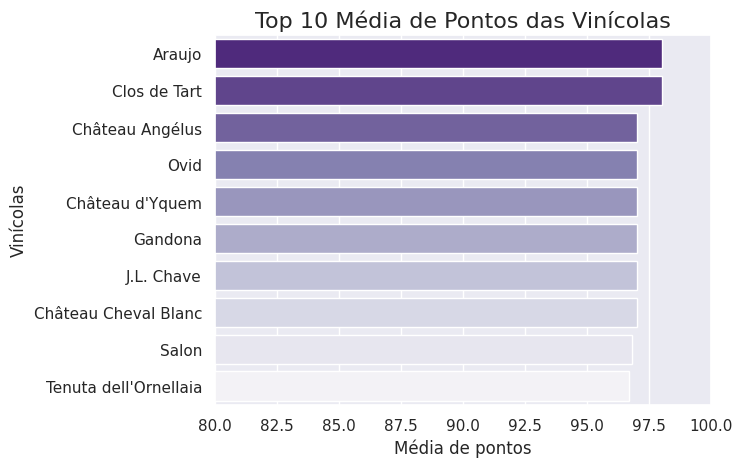

In [ ]:
top10_viniculas = resultado_df.sort_values(by='Md_Pontos', ascending=False)
plt.xlim(80, 100)
sns.barplot(x=top10_viniculas['Md_Pontos'], y=top10_viniculas.index, palette="Purples_r")
plt.title("Top 10 Média de Pontos das Vinícolas", fontsize = 16)
plt.xlabel("Média de pontos")
plt.ylabel("Vinícolas")

OK!!! Mas quais tipos de uvas essas Vinícolas utilizam para terem uma pontuação alta?

In [ ]:
# Top10 Vinícolas
top_viniculas = resultado_df.index.tolist()
top_viniculas_df = df1[df1['winery'].isin(top_viniculas)]

# Quantidade de avaliações de tipos de uva dentro do Top10 vinícola
variedades_top_viniculas = top_viniculas_df['variety'].value_counts()

print("Variedades utilizadas pelas top 10 vinícolas:")
variedades_top_viniculas_df = variedades_top_viniculas.to_frame()
variedades_top_viniculas_df.columns = ['count']
variedades_top_viniculas_df.style.background_gradient(cmap="Purples", high=0.5)

Variedades utilizadas pelas top 10 vinícolas:


Podemos perceber quais tipos de uvas são utilizadas pelas Top 10 Vinícolas, mas sabendo disso temos que analisar se essas variedades é as que possuem maiores pontuação, para isso podemos analisar a média de pontos das Top 10 variedades de Uva:

In [ ]:
# Calcular a média de pontos por variedade
media_tipo = df1.groupby("variety")["points"].agg("mean")

# Calcular a quantidade de avaliações por variedade
avaliacoes_top_tipos = df1['variety'].value_counts()

# Juntar as duas Series em um único DataFrame
resultado_tipo_df = media_tipo.loc[avaliacoes_top_tipos.index].to_frame()
resultado_tipo_df.columns = ['Md_Pontos']
resultado_tipo_df['Qtd'] = avaliacoes_top_tipos.values

resultado_tipo_df = resultado_tipo_df.sort_values(by='Md_Pontos', ascending=False)[:10]
resultado_tipo_df_styled = resultado_tipo_df.style.background_gradient(cmap="Purples", high=0.5)

resultado_tipo_df_styled

Agora vamos colocar em um gráfico para termos uma melhor análise:

<ipython-input-115-4f3f79808711>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_tipo['Md_Pontos'], y=top10_tipo.index, palette="Purples_r")


Text(0, 0.5, 'Variedades')

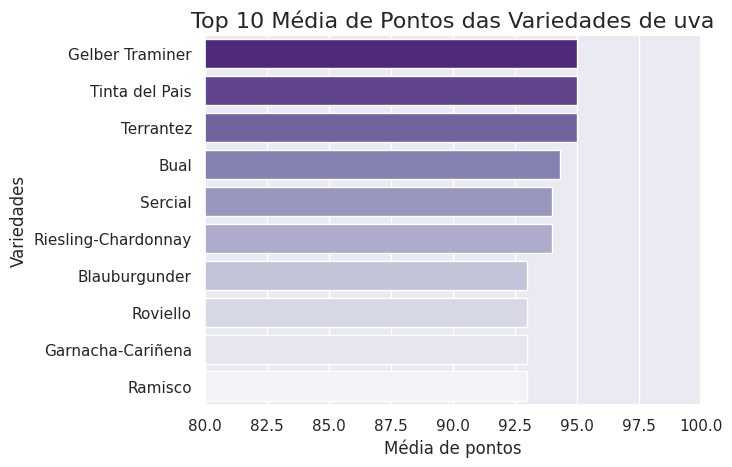

In [ ]:
top10_tipo = resultado_tipo_df.sort_values(by='Md_Pontos', ascending=False)
plt.xlim(80, 100)
sns.barplot(x=top10_tipo['Md_Pontos'], y=top10_tipo.index, palette="Purples_r")
plt.title("Top 10 Média de Pontos das Variedades de uva", fontsize = 16)
plt.xlabel("Média de pontos")
plt.ylabel("Variedades")

Podemos perceber que não necessáriamente as melhores Vinícolas utilizam as melhores variedades de uva. Tambem temos que levar em consideração que essa análise é feita de acordo com a média, ou seja, existem outros tipos de Uvas que possuem uma quantidade de avaliações maiores, porém uma média menor.

Vamos trabalhar agora com avaliações, buscando analisar se dentro do Top10 países mais avaliados, o Top10 variedades de uva são utilizados, ou seja, se esta relacionado com o uso:

In [ ]:
# Top10 avaliações por País
avaliacoes_por_pais = df["country"].value_counts()[:10]
top10_paises = avaliacoes_por_pais.index.tolist()

# Top10 avaliações por tipo de uva
avaliacoes_por_variedade = df["variety"].value_counts()[:10]
top10_variedades = avaliacoes_por_variedade.index.tolist()

filtro_df = df[df['country'].isin(top10_paises) & df['variety'].isin(top10_variedades)]
contagem_variedades_por_pais = filtro_df.groupby(['country', 'variety']).size().unstack(fill_value=0)

Criando um heatmap:

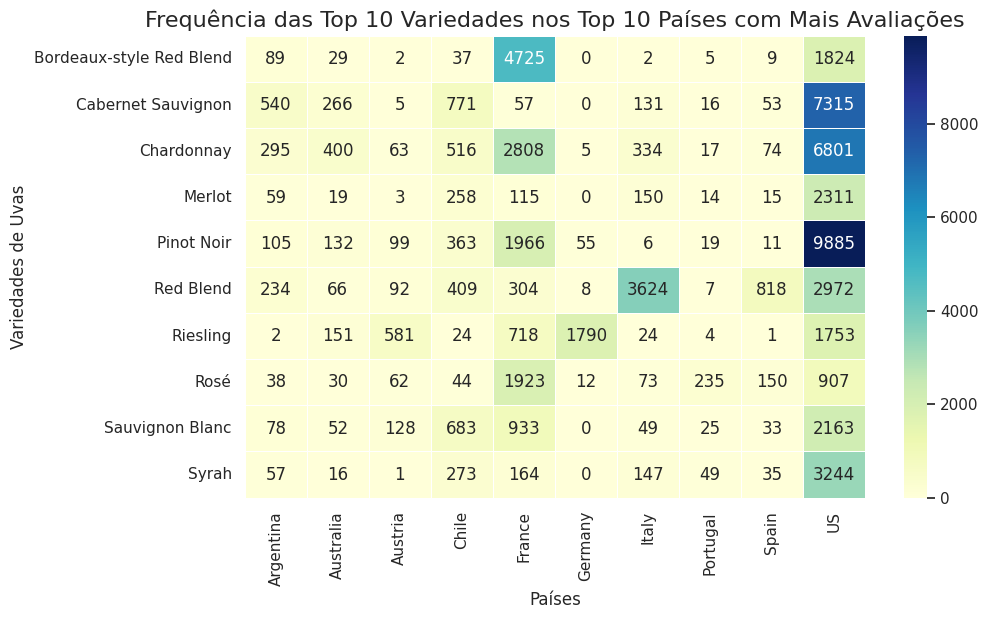

In [ ]:
# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contagem_variedades_por_pais.T, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title("Frequência das Top 10 Variedades nos Top 10 Países com Mais Avaliações", fontsize=16)
plt.xlabel("Países")
plt.ylabel("Variedades de Uvas")
plt.show()

Podemos concluir que não, ja que em certo países como nos EUA se utiliza em grande parte o Pinot Noir, mas em outros países não é o mais utilizado, muito pelo contrário, a mesma coisa na França, Itália, Alemanha e por ai vai. Concluindo que não esta relacionado, ou seja, deduzimos que as uvas podem não estar presentes nas outras regiões.


Criando uma nuvem das Vinícolas mais avaliadas:

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text_winery = df1["winery"][1]
text_winery = " ".join(i for i in df1["winery"])
len(text_winery)

1583658

In [ ]:
stopwords = set(STOPWORDS)
wordscloud = WordCloud(stopwords=stopwords,
                       background_color="white",
                       width=2048,
                       height=1024,
                       max_words=1000).generate(text_winery)

(-0.5, 2047.5, 1023.5, -0.5)

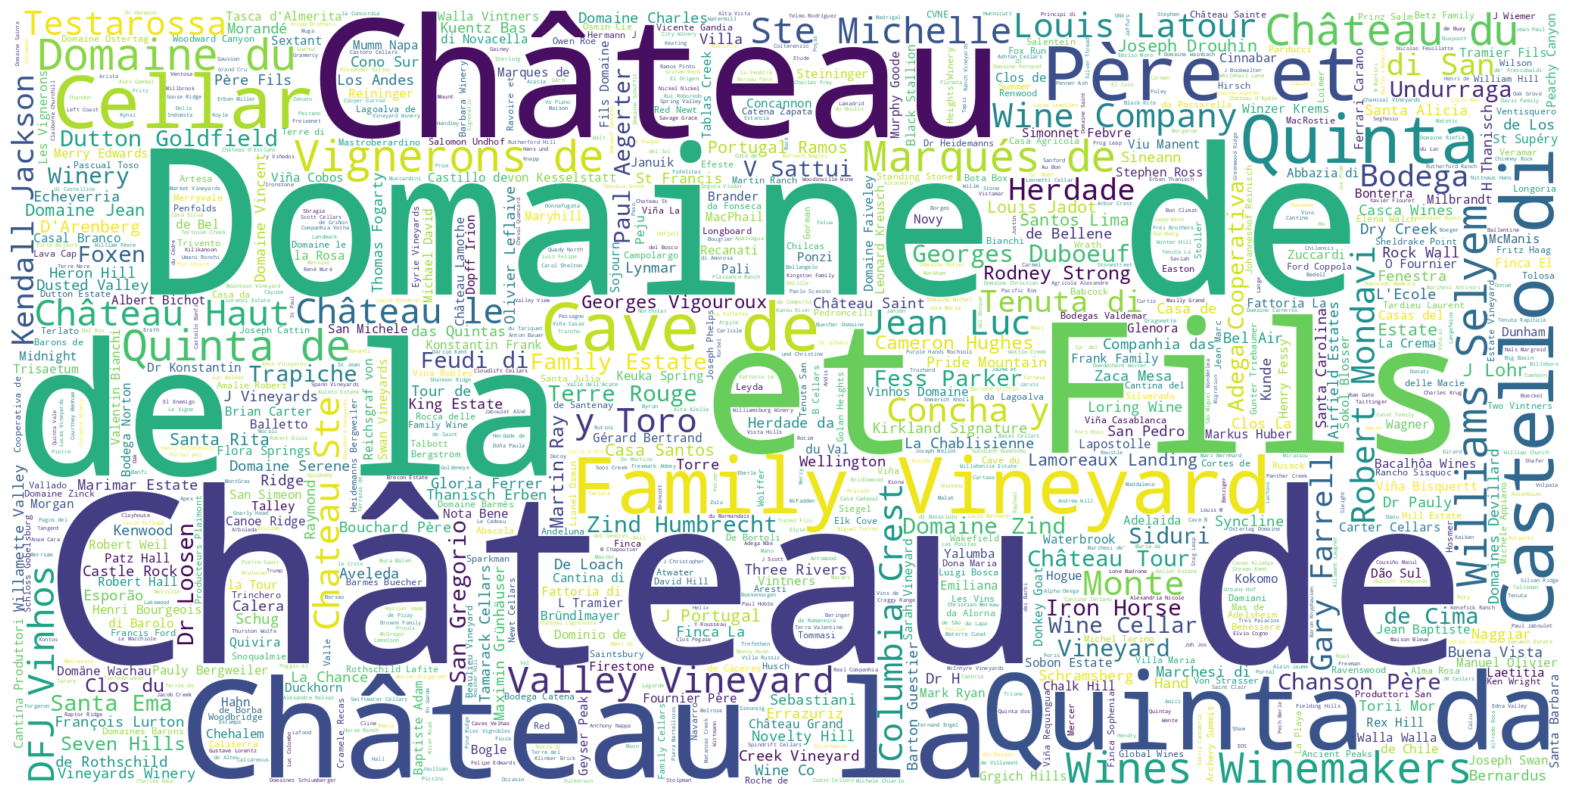

In [ ]:
plt.figure(figsize=(20,18))
plt.imshow(wordscloud, interpolation="bilinear")
plt.axis("off")

# Conclusão 2

Vamos responder mais algumas perguntas.

* **As melhores Vinícolas esta relacionados com os melhores tipos de uva?**

   *R: Com base nas análises, podemos afirmar que não, ja que as melhores Vinícolas(Top10 com maiores médias) não utilizam as melhores Variedades de Uva(Top10 com maiores médias).*

* **Os países tem uma tendência a utilizar as mesmas variedades de uva?**

   *R: Não, algumas variedades são mais utilizadas em alguns países do que em outros, podemos pegar por exemplo `Bordeaux-style Red Blend` que é o mais utilizado na França mas em outros países chegam a ser o menos utilizado, outro exemplo é nos EUA que utiliza `Pinot Noir`, sendo disparado o mais utilizado dentro do Top10 países mais avaliados, mas não chega a ser o mais usado nos outros países. com base nessa analise podemos concluir que os páises tendem a utilizar a variedade local de cada região.*

* **Que Vinícolas aparecem mais na nuvem de palavras?**

   *R: Na nuvem de palavras as Vinícolas que mais aparecem são `Château`, `Domaine de la` e `Et Fils`.*